In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Traitement du signal
from scipy import signal
import mne

# Machine Learning et Deep Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import torch


# Visualisation
import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.express as px

# Gestion de Notebooks
#import papermill as pm
import ipywidgets as widgets

# Utilitaires
import joblib
import yaml
import pickle
import os
import sys
import importlib

# Importation code local
sys.path.append('preprocessing')
import preprocess
import dataset
import torchcam
import models.GGN.ggn_model as GGN
import models.GGN.train as train
import models.EEGNet.EEGNet as EEGNet
import models.EEGDeformer.EEGDeformer as EEGDeformer
sys.path.append('evaluation')
import within_session
importlib.reload(preprocess)
importlib.reload(GGN)
importlib.reload(train)
importlib.reload(dataset)
importlib.reload(within_session)


<module 'dataset' from '/project/166600089/marc-debug-grad-cam-cnn/preprocessing/dataset.py'>

## Chargement de la configuration du projet

In [2]:
# Chargement de la configuration YAML
with open("config.yml", "r") as file:
    config = yaml.safe_load(file)
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Preprocessing

In [4]:
preprocess.preprocess_data(config)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Saved epoch 1 for sub-003 task audioactive to data/processed/sub-003/audioactive/1-epo.fif
Saved epoch 2 for sub-003 task audioactive to data/processed/sub-003/audioactive/2-epo.fif
Saved epoch 3 for sub-003 task audioactive to data/processed/sub-003/audioactive/3-epo.fif
Saved epoch 4 for sub-003 task audioactive to data/processed/sub-003/audioactive/4-epo.fif
Saved epoch 5 for sub-003 task audioactive to data/processed/sub-003/audioactive/5-epo.fif
Saved epoch 6 for sub-003 task audioactive to data/processed/sub-003/audioactive/6-epo.fif
Saved epoch 7 for sub-003 task audioactive to data/processed/sub-003/audioactive/7-epo.fif
Saved epoch 8 for sub-003 task audioactive to data/processed/sub-003/audioactive/8-epo.fif
Saved epoch 9 for sub-003 task audioactive to data/processed/sub-003/audioactive/9-epo.fif
Saved epoch 10 for sub-003 task audioactive to data/processed/sub-003/audioactive/10-epo.fif
Saved epoch 11 for sub-003 task audioactive to data/processed/sub-003/audioactive/11-epo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Saved epoch 1 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/1-epo.fif
Saved epoch 2 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/2-epo.fif
Saved epoch 3 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/3-epo.fif
Saved epoch 4 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/4-epo.fif
Saved epoch 5 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/5-epo.fif
Saved epoch 6 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/6-epo.fif
Saved epoch 7 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/7-epo.fif
Saved epoch 8 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/8-epo.fif
Saved epoch 9 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/9-epo.fif
Saved epoch 10 for sub-003 task audiopassive to data/processed/sub-003/audiopassive/10-epo.fif
Saved epoch 11 for sub-003 task audiopassive to data/processed/sub-0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Saved epoch 1 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/1-epo.fif
Saved epoch 2 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/2-epo.fif
Saved epoch 3 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/3-epo.fif
Saved epoch 4 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/4-epo.fif
Saved epoch 5 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/5-epo.fif
Saved epoch 6 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/6-epo.fif
Saved epoch 7 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/7-epo.fif
Saved epoch 8 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/8-epo.fif
Saved epoch 9 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/9-epo.fif
Saved epoch 10 for sub-003 task thermalactive to data/processed/sub-003/thermalactive/10-epo.fif
Saved epoch 11 for sub-003 task thermalactive to

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Saved epoch 1 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/1-epo.fif
Saved epoch 2 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/2-epo.fif
Saved epoch 3 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/3-epo.fif
Saved epoch 4 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/4-epo.fif
Saved epoch 5 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/5-epo.fif
Saved epoch 6 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/6-epo.fif
Saved epoch 7 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/7-epo.fif
Saved epoch 8 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/8-epo.fif
Saved epoch 9 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/9-epo.fif
Saved epoch 10 for sub-003 task thermalpassive to data/processed/sub-003/thermalpassive/10-epo.fif
Saved epoch 11 for sub-003 t

## Model Training

Epoch [1/50], Loss: 0.6946
Validation Loss: 0.6951


Epoch [2/50], Loss: 0.6943
Validation Loss: 0.6946


Epoch [3/50], Loss: 0.6939
Validation Loss: 0.6940


Epoch [4/50], Loss: 0.6936
Validation Loss: 0.6934


Epoch [5/50], Loss: 0.6929
Validation Loss: 0.6923


Epoch [6/50], Loss: 0.6920
Validation Loss: 0.6909


Epoch [7/50], Loss: 0.6908
Validation Loss: 0.6888


Epoch [8/50], Loss: 0.6885
Validation Loss: 0.6856


Epoch [9/50], Loss: 0.6855
Validation Loss: 0.6801


Epoch [10/50], Loss: 0.6810
Validation Loss: 0.6717


Epoch [11/50], Loss: 0.6726
Validation Loss: 0.6590


Epoch [12/50], Loss: 0.6599
Validation Loss: 0.6418


Epoch [13/50], Loss: 0.6463
Validation Loss: 0.6248


Epoch [14/50], Loss: 0.6312
Validation Loss: 0.6202


Epoch [15/50], Loss: 0.6238
Validation Loss: 0.6130


Epoch [16/50], Loss: 0.6079
Validation Loss: 0.6015


Epoch [17/50], Loss: 0.6001
Validation Loss: 0.5921


Epoch [18/50], Loss: 0.5833
Validation Loss: 0.5768


Epoch [19/50], Loss: 0.5691
Validation Loss: 0.5758


Epoch [20/50], Loss: 0.5524
Validation Loss: 0.5731


Epoch [21/50], Loss: 0.5344
Validation Loss: 0.5628


Epoch [22/50], Loss: 0.5087
Validation Loss: 0.5408


Epoch [23/50], Loss: 0.4871
Validation Loss: 0.5501


Epoch [24/50], Loss: 0.4663
Validation Loss: 0.5392


Epoch [25/50], Loss: 0.4723
Validation Loss: 0.5181


Epoch [26/50], Loss: 0.4212
Validation Loss: 0.5023


Epoch [27/50], Loss: 0.4057
Validation Loss: 0.5012


Epoch [28/50], Loss: 0.3675
Validation Loss: 0.4977


Epoch [29/50], Loss: 0.3506
Validation Loss: 0.5289


Epoch [30/50], Loss: 0.3271
Validation Loss: 0.5244


Epoch [31/50], Loss: 0.3436
Validation Loss: 0.5123


Epoch [32/50], Loss: 0.3173
Validation Loss: 0.5129


Epoch [33/50], Loss: 0.2821
Validation Loss: 0.5381


Epoch [34/50], Loss: 0.2603
Validation Loss: 0.5482


Epoch [35/50], Loss: 0.2398
Validation Loss: 0.5443


Epoch [36/50], Loss: 0.2344
Validation Loss: 0.6020


Epoch [37/50], Loss: 0.2215
Validation Loss: 0.5612


Epoch [38/50], Loss: 0.2040
Validation Loss: 0.5718


Epoch [39/50], Loss: 0.1813
Validation Loss: 0.6555


Epoch [40/50], Loss: 0.1767
Validation Loss: 0.6845


Epoch [41/50], Loss: 0.1905
Validation Loss: 0.6845


Epoch [42/50], Loss: 0.2305
Validation Loss: 0.7195


Epoch [43/50], Loss: 0.1335
Validation Loss: 0.7201


Epoch [44/50], Loss: 0.1162
Validation Loss: 0.6539


Epoch [45/50], Loss: 0.1081
Validation Loss: 0.7051


Epoch [46/50], Loss: 0.0828
Validation Loss: 0.7555


Epoch [47/50], Loss: 0.0705
Validation Loss: 0.8435


Epoch [48/50], Loss: 0.0644
Validation Loss: 0.8294


Epoch [49/50], Loss: 0.0561
Validation Loss: 0.8838


Epoch [50/50], Loss: 0.0540
Validation Loss: 0.8947
Test Loss: 0.5616
Test Accuracy: 77.45%
Recall (Sensitivity): 0.77
Precision: 0.78
F1 Score: 0.78
AUC-ROC: 0.86


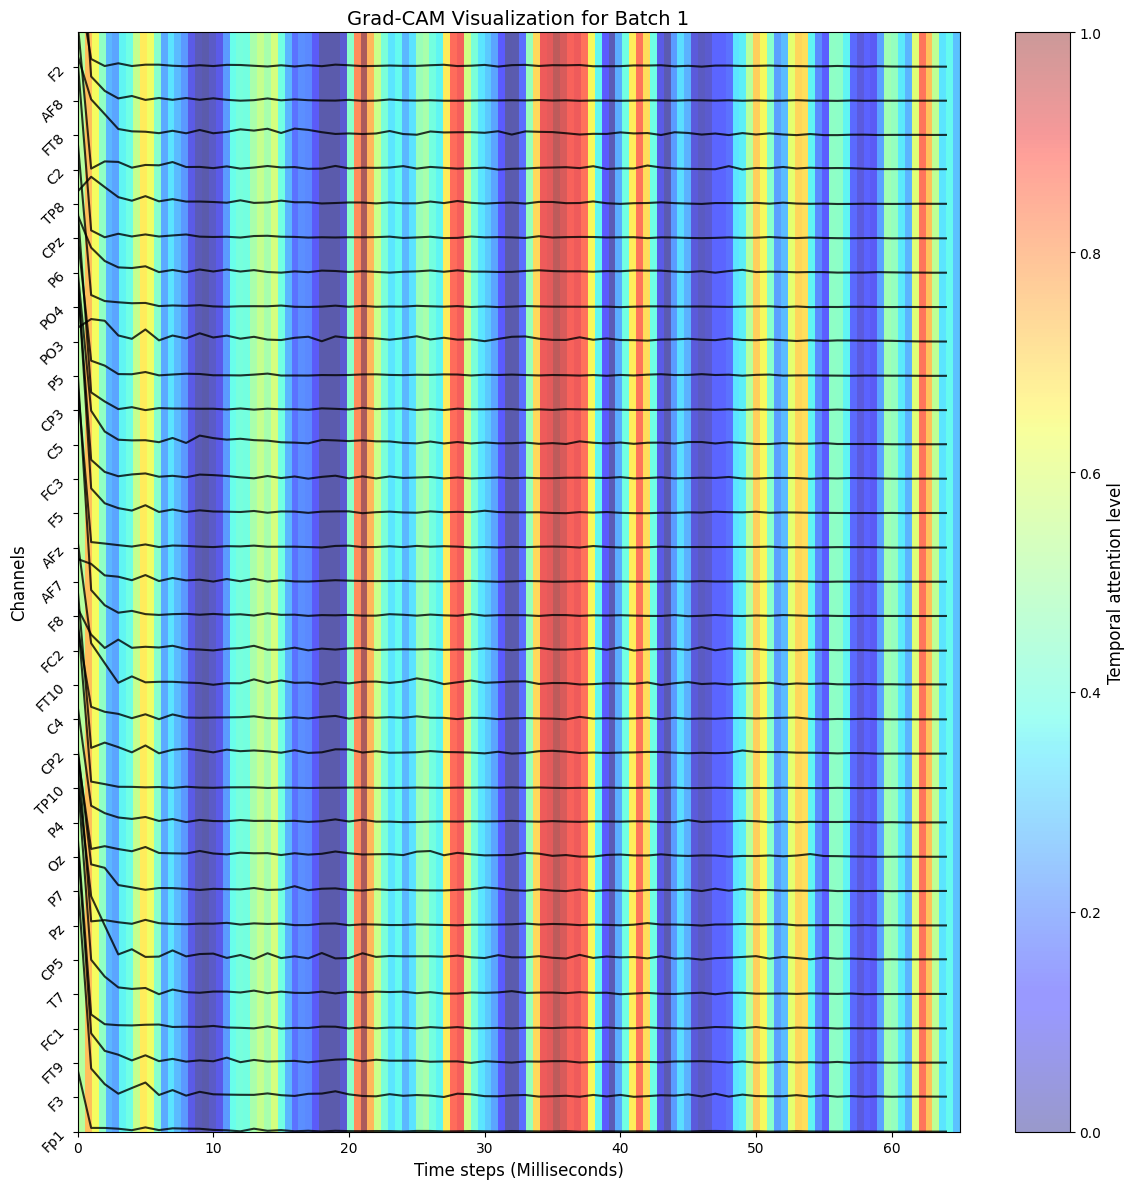

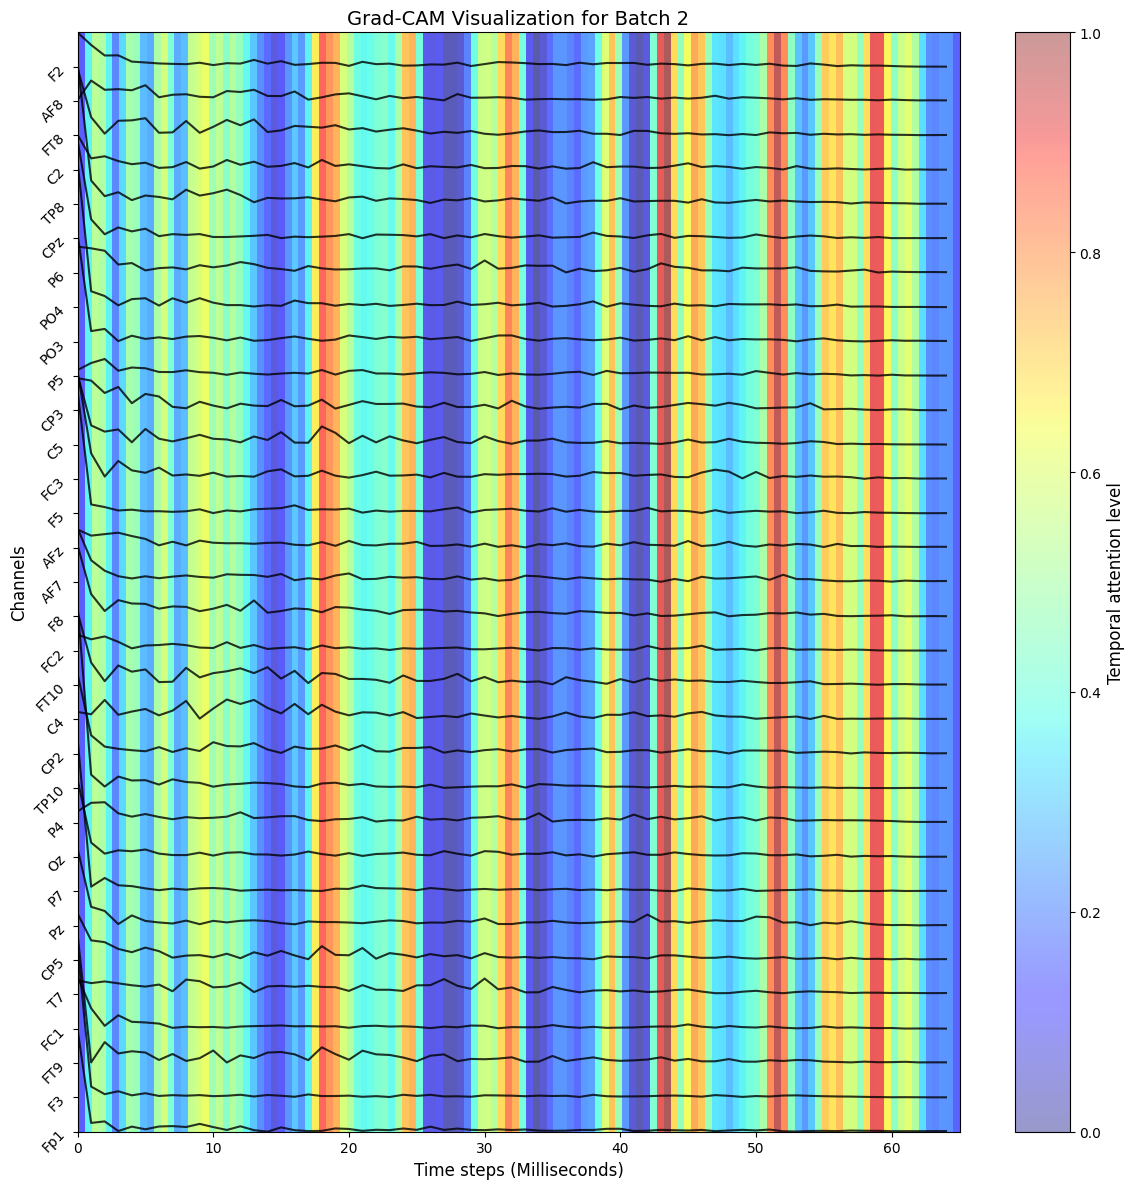

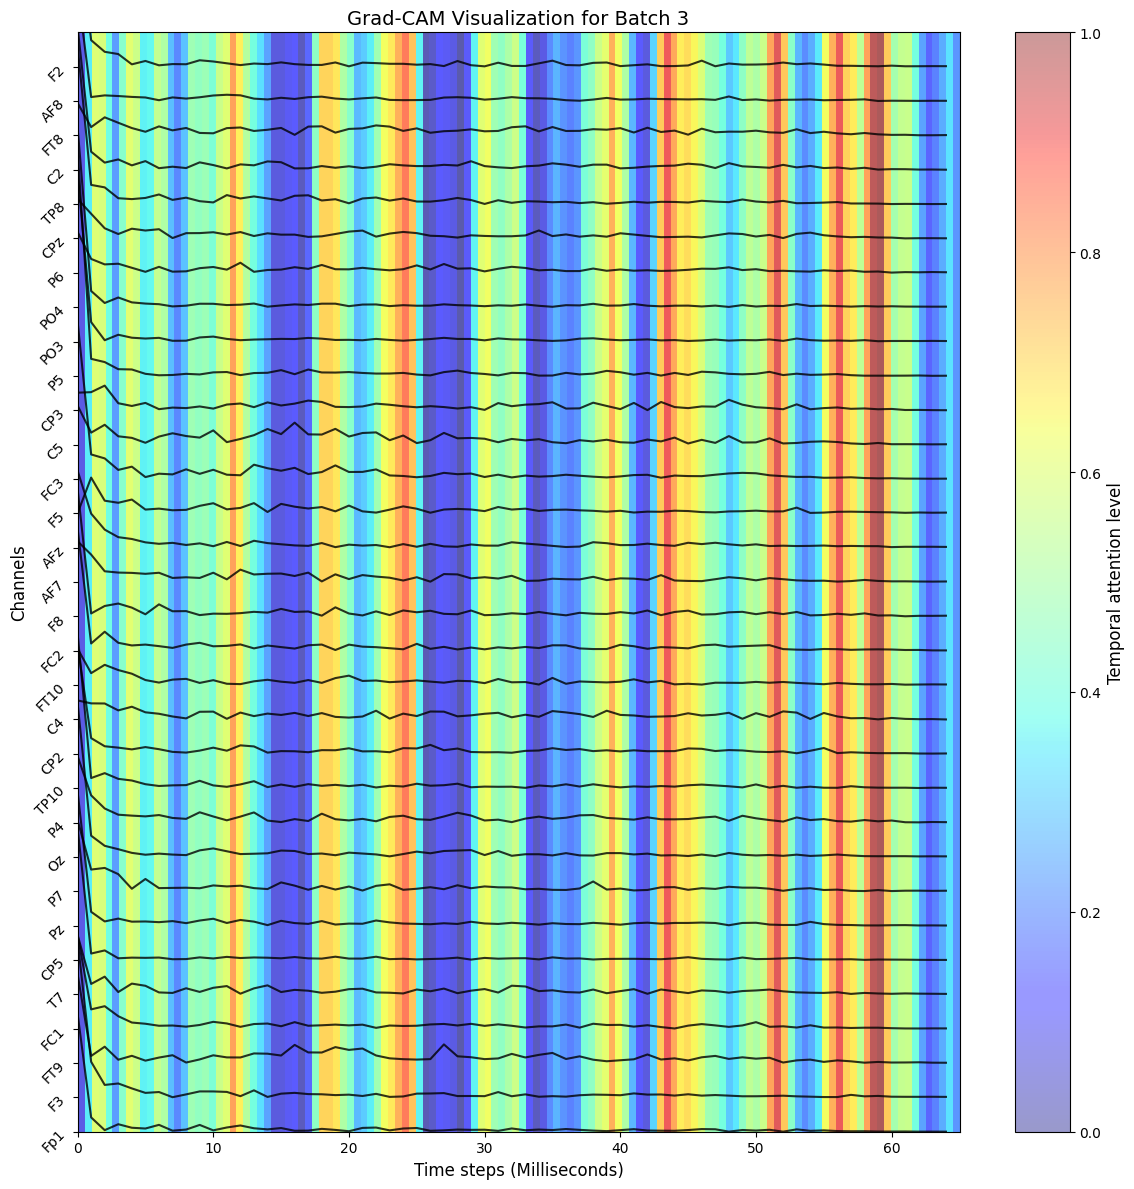

Mean Test Loss across all subjects: 0.5616
Mean Test Accuracy across all subjects: 77.45%
Mean Recall (Sensitivity) across all subjects: 0.77
Mean Precision across all subjects: 0.78
Mean F1 Score across all subjects: 0.78
Mean AUC-ROC across all subjects: 0.86


In [43]:
running_model = config['project_config']['running_model']

subjects_id = config['data']['subjects']

bids_root = config['data']['path']


test_losses = []
accuracies = []
recalls = []
precisions = []
f1_scores = []
auc_rocs = []

if not subjects_id:
        subjects_id = [
            d for d in os.listdir(bids_root)
            if os.path.isdir(os.path.join(bids_root, d)) and d.startswith("sub-")
        ]
        print(f"Aucun ID de sujet spécifié. Tous les sujets détectés : {subjects_id}")

for subject in subjects_id:

    if running_model == "GGN":
        train_loader, val_loader, test_loader = dataset.create_dataloader([subject], config)

        model = GGN.GGN(**config['models']['GGN']['parameters'], device=device)
        
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 50

        # Train and validate the model
        train.train(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

        # Test the model
        avg_test_loss, accuracy, recall, precision, f1, auc_roc = train.test(model, test_loader, criterion, device)
        test_losses.append(avg_test_loss)
        accuracies.append(accuracy)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1)
        auc_rocs.append(auc_roc)
        
        model.explain_temporal_cnn(test_loader, device)
        

    elif running_model == "SVM":
        train_loader, val_loader, test_loader = dataset.create_dataloader([subject], config)

        # Convert data loaders to numpy arrays
        X_train, y_train = preprocess.dataloader_without_topology_to_numpy(train_loader)
        X_val, y_val = preprocess.dataloader_without_topology_to_numpy(val_loader)
        X_test, y_test = preprocess.dataloader_without_topology_to_numpy(test_loader)
        
        print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
        print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
        print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

        # Reshape data
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_val = X_val.reshape(X_val.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

        # Train the SVM
        svm_params = config['models']['SVM']['parameters']
        svm = SVC(**svm_params)
        svm.fit(X_train, y_train)

        # Evaluate on validation set
        y_val_pred = svm.predict(X_val)
        val_acc = accuracy_score(y_val, y_val_pred)

        # Test the model
        y_test_pred = svm.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        accuracies.append(test_acc)

    elif running_model == "EEGNet":
        model = EEGNet.EEGNet(nb_classes = 2).to(device)

        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

        within_session.within_session_evaluation(config, model, criterion, optimizer, device)
         
    elif running_model == "EEGDeformer":
        model = EEGDeformer.Deformer(num_chan=64, num_time=65, temporal_kernel=11, num_kernel=64,
                num_classes=2, depth=4, heads=8,
                mlp_dim=8, dim_head=8, dropout=0.).to(device)
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

        within_session.within_session_evaluation(config, model, criterion, optimizer, device)

# Calculate mean test accuracy across all subjects
mean_test_loss = np.mean(test_losses)
mean_accuracy = np.mean(accuracies)
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)
mean_f1 = np.mean(f1_scores)
mean_auc_roc = np.mean(auc_rocs)

print(f"Mean Test Loss across all subjects: {mean_test_loss:.4f}")
print(f"Mean Test Accuracy across all subjects: {mean_accuracy:.2f}%")
print(f"Mean Recall (Sensitivity) across all subjects: {mean_recall:.2f}")
print(f"Mean Precision across all subjects: {mean_precision:.2f}")
print(f"Mean F1 Score across all subjects: {mean_f1:.2f}")
print(f"Mean AUC-ROC across all subjects: {mean_auc_roc:.2f}")
